# Hello World!
Simple example of how to instantiate a client and run a workflow in the FarmVibes.AI cluster. To install the required packages, see [this README file](README.md).

In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import rasterio
from shapely import geometry as shpg

from vibe_core.client import get_default_vibe_client

In [5]:
client = get_default_vibe_client()
# Recife - Brazil
geometry = shpg.Point(-34.9, -8.05).buffer(.1)
time_range = (datetime.now(), datetime.now())
run = client.run("helloworld", "Hello world! 👋", geometry=geometry, time_range=time_range)

run.monitor()

Output()

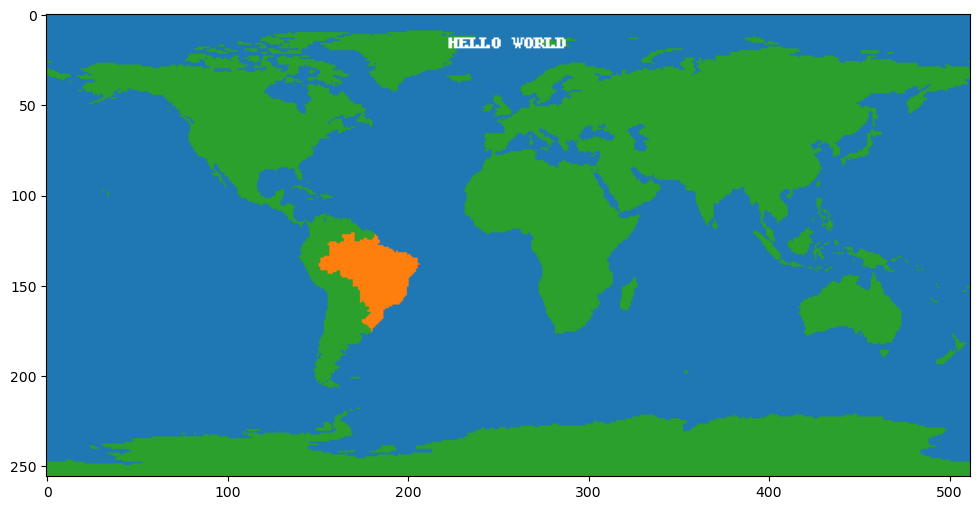

In [3]:
with rasterio.open(run.output["raster"][0].raster_asset.url) as src:
    data_ar = src.read()

plt.figure(figsize=(12, 6))
plt.imshow(data_ar.transpose((1, 2, 0)))
plt.show()